# TRADE ANALYSIS (Data Exploration with Python using Pandas & Numpy Libraries)
---

## Project Contents:

1. Project Information
2. Description of Data
3. Data Sampling
4. Project Objectives
5. Data Analysis
6. Observations / Findings
7. Managerial Insights / Recommendations
---

## 1. Project Information
* Title: Data Exploration with Python using Pandas & Numpy Libraries
* Students : **Shefali Dhingra (055043) , Mohit Agarwal (055024)**
* Group Number: 25

---

## 2. Description of Data

- Data Source: [Dataset link](https://www.kaggle.com/datasets/chakilamvishwas/imports-exports-15000)

### Data Columns Description:

1. Transaction_ID: Unique identifier for each trade transaction.
2. Country: Country of origin or destination for the trade.
3. Product: Product being traded.
4. Import_Export: Indicates whether the transaction is an import or export.
5. Quantity: Amount of the product traded.
6. Value: Monetary value of the product in USD.
7. Date: Date of the transaction.
8. Category: Category of the product (e.g., Electronics, Clothing, Machinery).
9. Port: Port of entry or departure.
10. Customs_Code: Customs or HS code for product classification.
11. Weight: Weight of the product in kilograms.
12. Shipping_Method: Method used for shipping (e.g., Air, Sea, Land).
13. Supplier: Name of the supplier or manufacturer.
14. Customer: Name of the customer or recipient.
15. Invoice_Number: Unique invoice number for the transaction.
16. Payment_Terms: Terms of payment (e.g., Net 30, Net 60, Cash on Delivery).

Data Type: Since the dataset contains multiple entities (countries) and records data over time, this is an example of **Panel Data** (also called longitudinal data)

In [1]:
# Import Relevant Python Libraries

import pandas as pd
import numpy as np
import scipy.stats as stats
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
# Load the Test Data

my_df = pd.read_csv("Imports_Exports_Dataset.csv",index_col="Transaction_ID")

In [3]:
# Data Dimensions
print("The dimensions of the data is: ",my_df.shape)

The dimensions of the data is:  (15000, 15)


In [4]:
# Data Variable Type
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, e3e70682-c209-4cac-a29f-6fbed82c07cd to 5cc039d0-a052-41fd-bfbb-c9f60c4565ac
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          15000 non-null  object 
 1   Product          15000 non-null  object 
 2   Import_Export    15000 non-null  object 
 3   Quantity         15000 non-null  int64  
 4   Value            15000 non-null  float64
 5   Date             15000 non-null  object 
 6   Category         15000 non-null  object 
 7   Port             15000 non-null  object 
 8   Customs_Code     15000 non-null  int64  
 9   Weight           15000 non-null  float64
 10  Shipping_Method  15000 non-null  object 
 11  Supplier         15000 non-null  object 
 12  Customer         15000 non-null  object 
 13  Invoice_Number   15000 non-null  int64  
 14  Payment_Terms    15000 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory 

### Data Variable Type
As observed, the dataset contains:
1. **All** non-null Variables
2. Numbers:
    1. Interger Variables: **3**  (*Quantity, Customs_Code, Invoice_Number*)
    2. Float (Decimal) Variables: **2**  (*Value, Weight*)
3. Text: **9**  (*Country, Product, Import_Export, Category, Port, Shipping_Method, Supplier, Customer, Payment_Terms*)
4. DateTime: **1** (*Date*)

## 3. Data Sampling

In [5]:
# A Unique Sample of 2001 Records 
my_sample = pd.DataFrame.sample(my_df, n=2001, random_state=25 ,ignore_index=False)

my_sample['Total_Value'] = round(my_sample['Value']*my_sample['Quantity'],0)

In [6]:
# Displaying the Dimensions of Sample Data.
my_sample.shape

(2001, 16)

In [7]:
my_sample.head(n=3)

,Country,Product,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms,Total_Value
Transaction_ID,,,,,,,,,,,,,,,,
27642695-29f2-4864-8650-232095017a24,United Kingdom,society,Export,7167,1312.05,12-03-2022,Toys,Moodyfurt,586678,1877.87,Land,Anderson-Williams,Earl Green,39542245,Net 30,9403462.0
ab9190ba-7a15-4be5-a25e-2cd73327f319,Belarus,thus,Import,7856,9404.19,15-06-2022,Electronics,West Michelle,839195,1758.71,Sea,"Hansen, Burns and Campos",Jessica Duncan,95480876,Cash on Delivery,73879317.0
db29c218-2d69-4b77-8f40-b3880cc6985b,Azerbaijan,let,Export,18,7522.87,02-12-2021,Toys,Port Richardside,916350,4232.99,Air,Tucker-Townsend,Eric Ramsey,84265114,Prepaid,135412.0


### Data Variable Category

In [8]:
# Columns in the dataset
variables=list(my_sample.columns)
print("The Variables are:", variables)

The Variables are: ['Country', 'Product', 'Import_Export', 'Quantity', 'Value', 'Date', 'Category', 'Port', 'Customs_Code', 'Weight', 'Shipping_Method', 'Supplier', 'Customer', 'Invoice_Number', 'Payment_Terms', 'Total_Value']


In [9]:
# Bifurcating the Variables into Index, Categorical (Nominal, Ordinal) and Non-Categorical Variables

Index_variables=['Transaction_ID','Invoice_Number']
Nominal_Variables=[ 'Country','Product','Import_Export','Category','Port','Shipping_Method','Supplier','Customer']
Ordinal_variables=['Payment_Terms']
Categorical_variables = Nominal_Variables + Ordinal_variables
Non_Categorical_Variables=['Quantity','Value','Customs_Code','Weight']

---

## 4. Project Objectives: Trade Analysis

The objective of this project is to **understand the drivers of trade flow efficiency** by analyzing supplier behavior, payment terms, and order timing patterns.

The study aims to identify key **trends** in international trade, uncover trade flow dynamics, and assess frequently traded goods. By highlighting seasonal and regional variations, it seeks to provide actionable insights that can inform decisions on optimizing global trade processes.

---

## 5. Exploratory Data Analysis

### 5.1.1. Non-Categorical Variables

In [10]:
my_sample[Non_Categorical_Variables].describe()

,Quantity,Value,Customs_Code,Weight
count,2001.000000,2001.000000,2001.000000,2001.000000
mean,5056.252874,5057.808326,547403.970515,2514.559630
std,2883.266420,2831.723338,259396.767120,1461.238112
min,5.000000,102.870000,100452.000000,5.860000
25%,2558.000000,2618.190000,329220.000000,1233.080000
50%,5118.000000,5019.040000,541213.000000,2521.100000
75%,7580.000000,7534.150000,776629.000000,3802.610000
max,9988.000000,9998.070000,999563.000000,4997.130000


In [11]:
def summarize_numerical(my_sample, variables):
    summary = {}
    
    for col in variables:
        if col in my_sample[Non_Categorical_Variables]:  # Check if the column exists in the DataFrame
            summary[col] = {
                'Mode': my_sample[col].mode()[0],
                'Range': my_sample[col].max() - my_sample[col].min(),
                'Skewness': my_sample[col].skew() ,
                'Kurtosis': my_sample[col].kurtosis()
            }
    return summary

In [12]:
summary_stats = summarize_numerical(my_sample, Non_Categorical_Variables)
summary_df = pd.DataFrame.from_dict(summary_stats, orient='index')
summary_df

,Mode,Range,Skewness,Kurtosis
Quantity,9154.00,9983.00,-0.035800,-1.222356
Value,470.79,9895.20,-0.000386,-1.184876
Customs_Code,347547.00,899111.00,0.037776,-1.171218
Weight,319.51,4991.27,-0.007058,-1.226472


In [13]:
correlation_data = my_sample[Non_Categorical_Variables]
correlation_matrix = correlation_data.corr()
print("Correlation Matrix:")
correlation_matrix

Correlation Matrix:


,Quantity,Value,Customs_Code,Weight
Quantity,1.000000,-0.031903,-0.037895,-0.018497
Value,-0.031903,1.000000,0.019199,-0.026325
Customs_Code,-0.037895,0.019199,1.000000,-0.017837
Weight,-0.018497,-0.026325,-0.017837,1.000000


In [14]:
# plt.figure(figsize=(6, 4))
# sns.histplot(my_sample['Value'].dropna(), kde=True, bins=30, color='blue')
# plt.title(f"Distribution of Value with Kurtosis:")
# plt.xlabel('Value')
# plt.ylabel('Frequency')
# plt.show()

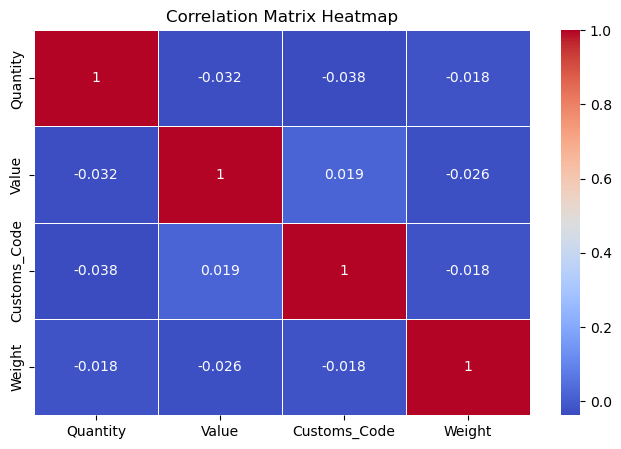

In [15]:
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### 5.1.2. Categorical (Based on Imports_Exports)

In [16]:
#Count of Imports and Exports
counts = my_sample['Import_Export'].value_counts()
counts

Import    1013
Export     988
Name: Import_Export, dtype: int64

In [17]:
# Frequency of Imports and Exports
frequency = counts / counts.sum()
round(frequency,2)

Import    0.51
Export    0.49
Name: Import_Export, dtype: float64

---> Comparable frequencies represent that data is split almost equal, thus minimising the need for data sampling

***Splitting Data into Imports and Exports***

In [18]:
Import_export_grouped = my_sample.groupby('Import_Export')
import_sample = Import_export_grouped.get_group('Import')
export_sample = Import_export_grouped.get_group('Export')

**Assumption**:
1. The Value for Imports = The CP for purchase of goods by a Country (Products brought into the Country)
2. The Value for Exports = The SP of goods exported to different Countries (Products Sold by a Country to Another)
3. **Similar shipping costs assumed over every medium of shipping and to and from each country due to limited availability of shipping cost data**

In [19]:
#Combining Value and Quantity to create Total Value Spent/Generated

export_sample['Total_Value'] = round(export_sample['Value']*export_sample['Quantity'],0)
import_sample['Total_Value'] = round(import_sample['Value']*import_sample['Quantity'],0)
#import_sample.head(3)

In [20]:
import_sample.shape, export_sample.shape

((1013, 16), (988, 16))

In [21]:
#Minimum and Maximum Values

#Country with Max Exports
print("Maximum Exports: ",export_sample['Country'].value_counts().idxmax())

Maximum Exports:  Congo


In [22]:
#Country with Min Exports
print("Minimum Exports: ",export_sample['Country'].value_counts().idxmin())

Minimum Exports:  Iran


In [23]:
#Country with Max Imports
print("Maximum Imports: ",import_sample['Country'].value_counts().idxmax())

Maximum Imports:  Chad


In [24]:
#Country with Min Imports
print("Minimum Imports: ",import_sample['Country'].value_counts().idxmin())

Minimum Imports:  Bouvet Island (Bouvetoya)


In [25]:
counts.rank(ascending=False)

Import    1.0
Export    2.0
Name: Import_Export, dtype: float64

The no. of Imports in the sample is more than no. of Exports, but sice their frquencies are comparable, they dont have much difference between no. of values

---

### Further the Trade Trend Analysis, based on Imports and Exports:

#### A. Trade Volume Analysis

In [26]:
#Total Value of Goods Exported and Imported between 2019 to 2024

import_export_comparison = my_sample.groupby('Import_Export')[['Value']].sum()
import_export_comparison

,Value
Import_Export,
Export,4930154.32
Import,5190520.14


In [27]:
#Top 10 Countries with Maximum Export Sales Profits

trade_volume_country = export_sample.groupby('Country')[['Total_Value']].sum().sort_values(by='Total_Value', ascending=False)
trade_volume_country.head(n=10)

,Total_Value
Country,
India,437500308.0
Congo,419585262.0
Maldives,371578477.0
Kiribati,342040184.0
Czech Republic,290887468.0
Brazil,263285321.0
Liechtenstein,247446342.0
Palestinian Territory,242195253.0
Korea,241147261.0


In [28]:
# Top 10 Exported Products

Max_exported_prod = export_sample.groupby('Product')[['Quantity', 'Value']].sum().sort_values(by='Quantity', ascending=False)
Max_exported_prod.head(n=10)

,Quantity,Value
Product,,
onto,33534,31115.68
now,27952,14980.57
Mr,27638,30068.69
beyond,26878,16959.45
administration,26273,31302.21
course,25873,16601.72
organization,25827,11774.46
bank,24516,29501.23
guess,24115,17845.80


In [29]:
# Top 10 Products Imported based on Total Wealth Spent from 2019-2024

Max_imported_prod = import_sample.groupby('Product')[['Total_Value']].sum().sort_values(by='Total_Value', ascending=False)
Max_imported_prod.head(n=10)

,Total_Value
Product,
explain,185217130.0
strong,163991660.0
focus,163253032.0
create,157856030.0
mouth,153780509.0
act,149732244.0
heavy,147176759.0
place,145207075.0
she,143556471.0


In [30]:
# Top 10 Products Produced

Max_exported_prod = export_sample.groupby('Product')[['Total_Value']].sum().sort_values(by='Total_Value', ascending=False)
Max_exported_prod.head(n=10)

,Total_Value
Product,
onto,198229307.0
administration,187843822.0
fast,166754552.0
three,165838648.0
together,160434872.0
beyond,156714048.0
bank,152633463.0
Mr,152523406.0
receive,150787410.0


#### B. Temporal Trends (Yearly/Monthly Trends)

In [32]:
# Yearly Exports Volume in Descreasing Order (Highest to Lowest)

export_sample = export_sample.copy()
export_sample['Date'] = pd.to_datetime(export_sample['Date'], dayfirst=True, errors='coerce')
#errors = 'coerce' helps handle invalid date errors by replacing the value with NaT (Not a Time)
export_sample.loc[:, 'Year'] = export_sample['Date'].dt.year
yearly_trends = export_sample.groupby('Year')[['Total_Value']].sum().sort_values(by = 'Total_Value',ascending=False)
yearly_trends

,Total_Value
Year,
2021,5.272378e+09
2023,5.120668e+09
2020,5.070397e+09
2022,4.839864e+09
2024,3.118735e+09
2019,1.194756e+09


In [33]:
# Yearly Imports Volume in (Max to Min)

#errors = 'coerce' helps handle invalid date errors by replacing the value with NaT (Not a Time)
import_sample = import_sample.copy()
import_sample['Date'] = pd.to_datetime(import_sample['Date'], dayfirst=True, errors='coerce')
import_sample.loc[:, 'Year'] = import_sample['Date'].dt.year
yearly_trends_imports = import_sample.groupby('Year')[['Total_Value']].sum().sort_values(by = 'Total_Value',ascending=False)
yearly_trends_imports

,Total_Value
Year,
2022,6.026617e+09
2020,5.133057e+09
2021,5.003219e+09
2023,4.847689e+09
2024,3.512205e+09
2019,1.512159e+09


In [34]:
# Top 5 Months with highest volume of Imports

import_sample['Month'] = import_sample['Date'].dt.to_period('M')
monthly_trends = import_sample.groupby('Month')[['Total_Value']].sum().sort_values(by = 'Total_Value',ascending=False)
monthly_trends.head(5)

,Total_Value
Month,
2022-08,757535876.0
2022-03,688584591.0
2021-03,649563322.0
2019-12,642262340.0
2022-05,615447736.0


#### C. Geographical Trade Patterns

In [35]:
# Top 10 Countries Importing the highest valued goods [Maximum Amount spent on Goods Imported into the Country]

import_sample.groupby('Country')[['Total_Value']].sum().sort_values(by='Total_Value', ascending=False).head(10)

,Total_Value
Country,
Bahrain,462614400.0
Brazil,352224652.0
Belarus,343154718.0
Chad,335824117.0
Cuba,265570651.0
Costa Rica,259109571.0
Svalbard & Jan Mayen Islands,258667524.0
Mexico,257490126.0
Guinea-Bissau,256621335.0


In [36]:
# Top 10 Countries Exporting the highest Valued goods [Maximum weath generation by Exports]

export_sample.groupby('Country')[['Total_Value']].sum().sort_values(by='Total_Value', ascending=False).head(10)

,Total_Value
Country,
India,437500308.0
Congo,419585262.0
Maldives,371578477.0
Kiribati,342040184.0
Czech Republic,290887468.0
Brazil,263285321.0
Liechtenstein,247446342.0
Palestinian Territory,242195253.0
Korea,241147261.0


#### D. Supplier Behavior

In [37]:
# Top 10 Global Suppliers Exporting their Products, estimated by Wealth Generated

export_sample.groupby('Supplier')[['Total_Value']].sum().sort_values(by='Total_Value', ascending=False).head(10)

,Total_Value
Supplier,
Wright Group,129389112.0
Brown PLC,119468701.0
Hall Ltd,98236675.0
Proctor-Miranda,93508430.0
Carter Ltd,91149507.0
"Jones, Campos and Williams",89866258.0
"Jackson, Sherman and Proctor",89045170.0
Warren LLC,87747211.0
Campbell-Luna,87445925.0


#### E. Trade Performance (Evaluated based on Country)

In [38]:
trade_balance = my_sample.groupby(['Country', 'Import_Export'])[['Total_Value']].sum().unstack().fillna(0)
trade_balance.columns = ['Import_Total_Value', 'Export_Total_Value']
trade_balance['Trade_Balance'] = trade_balance['Export_Total_Value'] - trade_balance['Import_Total_Value']
#trade_balance.head(n=5)

*A positive trade balance represents that the particular country exports more than it imports, and vice-a-versa for Countries with negative Trade Balance*

In [39]:
# Top 5 Countries with Maximum Trade Balance

trade_balance.sort_values(by="Trade_Balance",ascending=False).head(5)

,Import_Total_Value,Export_Total_Value,Trade_Balance
Country,,,
Bahrain,108558544.0,462614400.0,354055856.0
Chad,48078097.0,335824117.0,287746020.0
Belarus,69956140.0,343154718.0,273198578.0
Cook Islands,19421476.0,243969513.0,224548037.0
Philippines,8828936.0,222085358.0,213256422.0


In [40]:
#Top 5 Countries Importing More than they Export

trade_balance.sort_values(by="Trade_Balance").head(5)

,Import_Total_Value,Export_Total_Value,Trade_Balance
Country,,,
Congo,419585262.0,78771069.0,-340814193.0
India,437500308.0,102938641.0,-334561667.0
Kiribati,342040184.0,60674565.0,-281365619.0
Japan,238520707.0,22360134.0,-216160573.0
Togo,220903877.0,7490949.0,-213412928.0


#### F. Cost and Revenue Analysis

In [41]:
# Average Trade Value (Combined for Imported an Exported Products)

average_value_per_transaction = my_sample['Value'].mean()
print(f"Average Trade Value per Transaction: ${round(average_value_per_transaction,2)}")

Average Trade Value per Transaction: $5057.81


In [42]:
# Average Value per Unit Analysis

my_sample['Value_per_Unit'] = my_sample['Value'] / my_sample['Quantity']
my_sample.groupby('Product')['Value_per_Unit'].mean().sort_values(ascending=False).head(10)

Product
need         1720.598000
everybody     219.208837
instead       153.331759
suddenly       96.101874
everyone       88.920656
let            85.361083
look           82.723503
southern       75.607608
early          42.629813
less           39.881519
Name: Value_per_Unit, dtype: float64

#### G. Shipping and Logistics Analysis

In [43]:
# Shipping Method Preferences for Exported Goods

export_sample['Shipping_Method'].value_counts()

Air     350
Sea     340
Land    298
Name: Shipping_Method, dtype: int64

In [44]:
# Shipping Method Preferences for Imported Goods

import_sample['Shipping_Method'].value_counts()

Air     345
Land    343
Sea     325
Name: Shipping_Method, dtype: int64

In [45]:
# Shipping Costs vs Product Value [imported Products]

import_sample.groupby('Shipping_Method')[['Weight']].mean()

,Weight
Shipping_Method,
Air,2527.548609
Land,2539.885481
Sea,2431.843569


In [46]:
# Shipping Costs vs Product Value [Exported Products]

my_sample.groupby('Shipping_Method')[['Weight']].mean()

,Weight
Shipping_Method,
Air,2567.510158
Land,2521.948284
Sea,2452.098361


*Due to various country compliances, different Forex and lack of data for prices for Shipping Methods, we will assume the cost of shipping to be negligible compared to The total Product Value*

#### H. Payment Term Analysis

In [47]:
# Common Payment Methods for Exported Products

export_sample['Payment_Terms'].value_counts()

Net 60              255
Cash on Delivery    252
Prepaid             248
Net 30              233
Name: Payment_Terms, dtype: int64

In [48]:
# Common Payment Methods for Imported Products

import_sample['Payment_Terms'].value_counts()

Cash on Delivery    270
Prepaid             260
Net 60              249
Net 30              234
Name: Payment_Terms, dtype: int64

In [49]:
# Payment Terms by Country (Irrespective of Exported/Imported Product)

payment_terms_by_country = my_sample.groupby('Country')['Payment_Terms'].value_counts().unstack().fillna(0)
payment_terms_by_country

Payment_Terms,Cash on Delivery,Net 30,Net 60,Prepaid
Country,,,,
Afghanistan,2.0,2.0,0.0,4.0
Albania,1.0,2.0,4.0,0.0
Algeria,3.0,1.0,1.0,3.0
American Samoa,1.0,4.0,1.0,2.0
Andorra,1.0,1.0,0.0,1.0
...,...,...,...,...
Wallis and Futuna,4.0,2.0,4.0,2.0
Western Sahara,1.0,4.0,0.0,3.0
Yemen,2.0,1.0,2.0,0.0


In [50]:
# Most Preffered Payment Terms by Countries
payment_terms_by_country.idxmax()

Payment_Terms
Cash on Delivery             Bahrain
Net 30                         India
Net 60              Marshall Islands
Prepaid                       Canada
dtype: object

In [51]:
# Least Preffered Payment Terms by Countries
payment_terms_by_country.idxmin()

Payment_Terms
Cash on Delivery          Benin
Net 30                   Bhutan
Net 60              Afghanistan
Prepaid                 Albania
dtype: object

In [52]:
# Time Between Orders
export_sample['Date'] = pd.to_datetime(export_sample['Date'])
export_sample = export_sample.sort_values(by='Date')
export_sample['Time_Between_Orders'] = export_sample['Date'].diff().dt.days
export_sample['Time_Between_Orders'].mean()

1.8490374873353597

In [53]:
import_sample['Date'] = pd.to_datetime(import_sample['Date'])
import_sample = import_sample.sort_values(by='Date')
import_sample['Time_Between_Orders'] = import_sample['Date'].diff().dt.days
import_sample['Time_Between_Orders'].mean()

1.8033596837944663

---> Comparabily Similar Times for both data

---

## 6. Observations

1. **Range:** There is a wide range in for each Non-Categorical Variable indicating that the dataset is diverse, suggesting significant variations.
2. **Skewness:** The Overall Data shows negligible values of skewness indicating that the distribution is majorly symmetrical with minimal skewness.
3. **Kurtosis:** All the variables display platykurtic distributions, implying fewer extreme outliers in the dataset.
4. **Frequency:** The Dataset is perfectly sampled with 0.51:0.49 ratio of Import_Export Values.
5. **Top Exporting Countries**: India, Congo, and Maldives are among the countries exporting the highest value of goods.
6. **Top Exported Products:** onto,now and Mr are top exported Products, although onto generates the most wealth for their suppliers, now is not amongst the top 10 weath generatoing product for the Country and Mr is at 8th position.
7. **Top Imported Products:** explain, strong and focus were top imported products.
8. **2021** was the year with maximum imported products and **2019** with minimum Exported Products. On of the probable causes could be **COVID-19**
9. **August 2018** was the month with highest volume of imports.
10. **Highest Valued Goods Imported:** Behrain, Brazil and Belarus
11. **Highest Valued Goods Exported:** India, Congo and Maldives
12. **Top Suppliers**: Wright Group and Brown PLC are leading suppliers, contributing the most in terms of total value of exported goods.
13. **Trade Balance:** Data consists of a positive trade balance represents that the particular country exports more than it imports, and vice-a-versa for Countries with negative Trade Balance. Bahrain has the maximum gap between trade balance, depicting the country focuses on Exports.
14. Average Trade Value per Transaction is **$5057.81**

15. Maximum Average value per product is for the product "need"
3. **Preferred Payment Terms**: Cash on Delivery is the most preferred payment term in Bahrain, while countries like India favor Net 30 terms.
4. **Time Between Orders**: The average time between orders is approximately 1.85 days for exports and 1.80 days for imports, indicating similar purchasing patterns.

---

## 7. Managerial Insights and Recommendations

1. **Leverage Export Strengths**:
   - Countries like India, Congo, and Maldives are consistently top exporters, indicating a strong export economy. Focus on strengthening relationships with these markets, negotiating better trade deals, and optimizing supply chains to boost export efficiency.
   - Since products like *onto* generate the most wealth for suppliers, it would be beneficial to incentivize its production and identify similar high-potential products.


2. **Address Import-Export Imbalances**:
   - Countries like **Bahrain**, with the largest gap in trade balance, should explore ways to increase domestic production or diversify export portfolios to reduce reliance on imports and improve their trade balance.
   - Countries with a negative trade balance could benefit from implementing policies that encourage local production of high-demand imported goods, potentially reducing import dependency.


3. **Product Portfolio Optimization**:
   - Products such as **now** are highly exported but do not generate the highest revenue. Reassess the pricing or marketing strategies for these products to increase profitability.
   - Focus on exporting products like **Mr**, which are in the top 10 wealth-generating categories but rank lower, indicating room for improvement in sales volume or pricing.


4. **Strengthen Supplier Relationships**:
   - **Wright Group** and **Brown PLC** are top suppliers. Establishing long-term contracts or exclusive agreements with such suppliers may lead to better pricing, consistent quality, and uninterrupted supply.
   - Encourage diversification of the supplier base to mitigate risk and ensure resilience against supply chain disruptions.


5. **Payment Terms Optimization**:
   - Countries such as **Bahrain** prefer **Cash on Delivery**, while **Net 30** is favored in India. To enhance cash flow, consider offering flexible payment terms based on regional preferences, particularly in countries with differing payment behaviors.
   - Offering incentives for early payment could also improve liquidity and reduce receivables.


6. **Market Analysis of Import Patterns**:
   - **August 2018** showed the highest volume of imports, which indicates possible seasonal trends. Use this information to plan inventory and logistics to meet demand spikes and ensure product availability.
   - Consider boosting marketing and sales efforts before peak import months to capitalize on heightened demand.


7. **Focus on High-Value Markets**:
   - Countries like **Bahrain, Brazil, and Belarus** import the highest valued goods, making them lucrative markets. Focus marketing efforts, introduce premium product lines, and strengthen trade relations with these countries to maximize profits.
   - Similarly, continue targeting **India, Congo, and Maldives** for export of high-value goods.

8. **Mitigate Risks from External Factors**:
   - The sharp drop in exports in **2019**, possibly due to **COVID-19**, highlights the vulnerability of international trade to global crises. Companies should consider diversifying markets and products to minimize the impact of such disruptions.
   - Building robust contingency plans, including diversified suppliers and alternative logistics channels, will help mitigate the risk of future disruptions.
   
9. **Increase Trade Value Per Transaction**:
    - With the average trade value per transaction being **$5057.81**, efforts should be made to increase the transaction value by offering product bundles, cross-selling, or up-selling high-value products like **need**.

By following these recommendations, companies can better optimize trade flows, manage risks, and capitalize on both import and export opportunities.

---